In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Users/irochka/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
data = pd.read_csv('data_processed.csv')

In [4]:
data.head()

,Unnamed: 0,address_id,cluster_id,received,sent
0,0,71413451,1.0,0.010036,0.000000
1,1,71413451,1.0,0.000000,0.010036
2,2,71411914,1.0,0.012594,0.000000
3,3,71411914,1.0,0.000000,0.012594
4,4,71410369,1.0,0.210090,0.000000


In [5]:
data = data.drop(['Unnamed: 0'],axis=1)
data.head()

,address_id,cluster_id,received,sent
0,71413451,1.0,0.010036,0.000000
1,71413451,1.0,0.000000,0.010036
2,71411914,1.0,0.012594,0.000000
3,71411914,1.0,0.000000,0.012594
4,71410369,1.0,0.210090,0.000000


In [6]:
data_cl_1 = data[data['cluster_id']==1]
data_cl_2 = data[data['cluster_id']==2]
data_cl_0 = data[data['cluster_id']==0]
data_cl_0.head()

,address_id,cluster_id,received,sent
58475,46402336,0.0,0.000000,0.018000
58476,46402336,0.0,0.009000,0.000000
58477,46402336,0.0,0.000000,0.009000
58478,46402336,0.0,0.000055,0.000000
58479,46402336,0.0,0.000000,0.000055


Text(0.5,1,'Received')

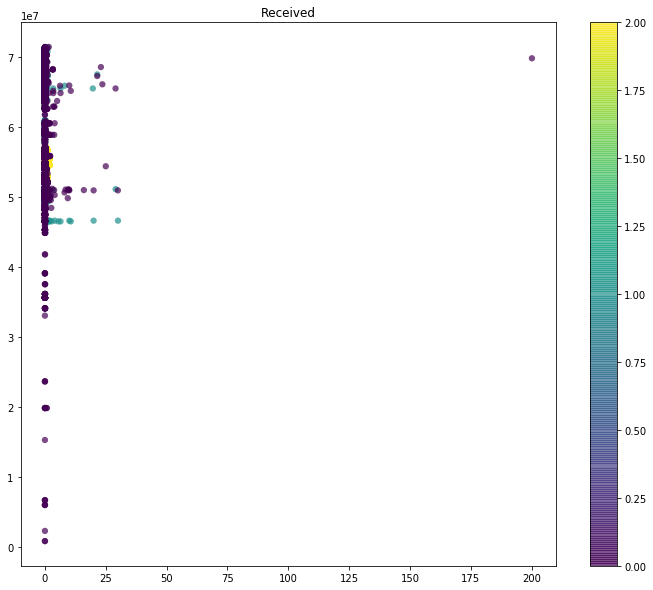

In [8]:
plt.figure(figsize=(12,10))
plt.scatter(data.received, data.address_id, c=data.cluster_id,edgecolor='none', alpha=0.7, s=40)
            
plt.colorbar()
plt.title('Received')

Text(0.5,1,'Sent')

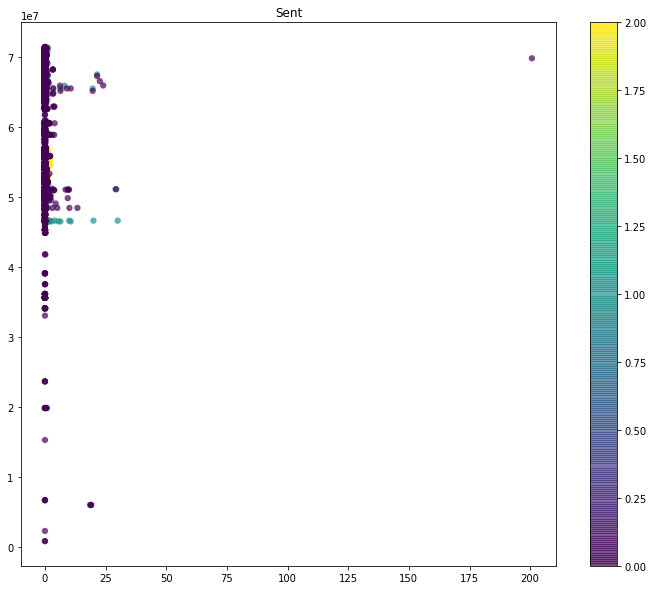

In [9]:
plt.figure(figsize=(12,10))
plt.scatter(data.sent, data.address_id, c=data.cluster_id,edgecolor='none', alpha=0.7, s=40)
            
plt.colorbar()
plt.title('Sent')

Text(0.5,1,'Received')

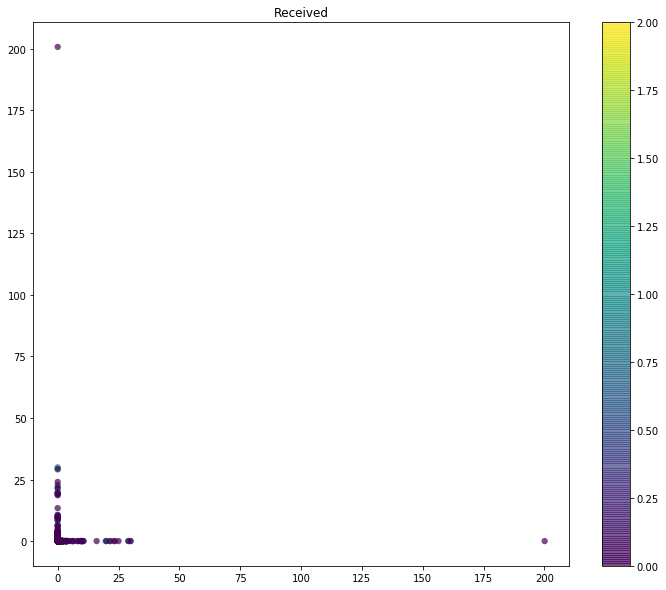

In [10]:
plt.figure(figsize=(12,10))
plt.scatter(data.received, data.sent, c=data.cluster_id,edgecolor='none', alpha=0.7, s=40)
            
plt.colorbar()
plt.title('Received')

Text(0.5,1,'Received')

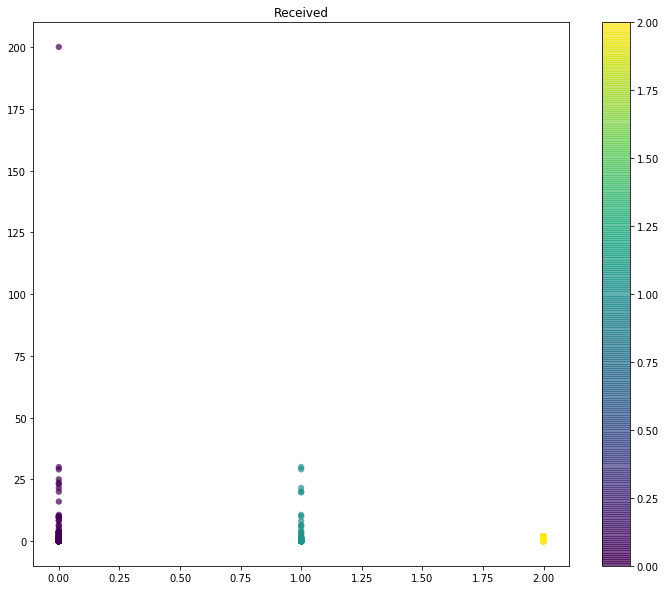

In [11]:
plt.figure(figsize=(12,10))
plt.scatter(data.cluster_id, data.received, c=data.cluster_id,edgecolor='none', alpha=0.7, s=40)
            
plt.colorbar()
plt.title('Received')

Text(0.5,1,'Received')

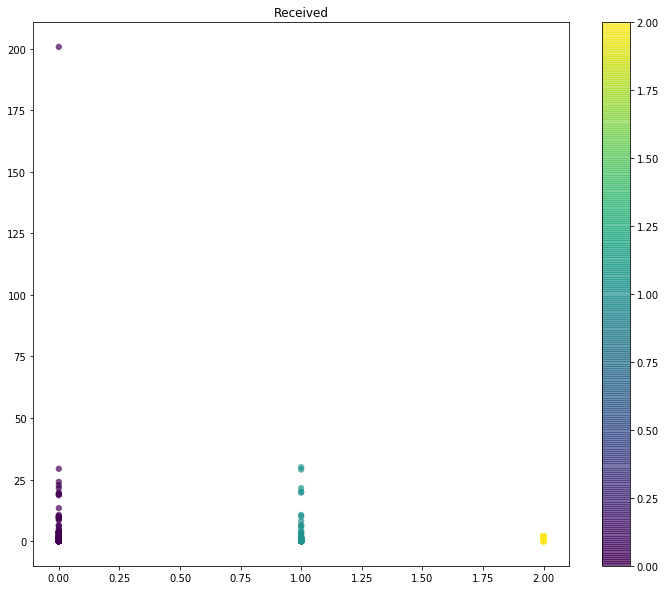

In [12]:
plt.figure(figsize=(12,10))
plt.scatter(data.cluster_id, data.sent, c=data.cluster_id,edgecolor='none', alpha=0.7, s=40)
            
plt.colorbar()
plt.title('Received')

Text(0.5,1,'Cluster #0 Received')

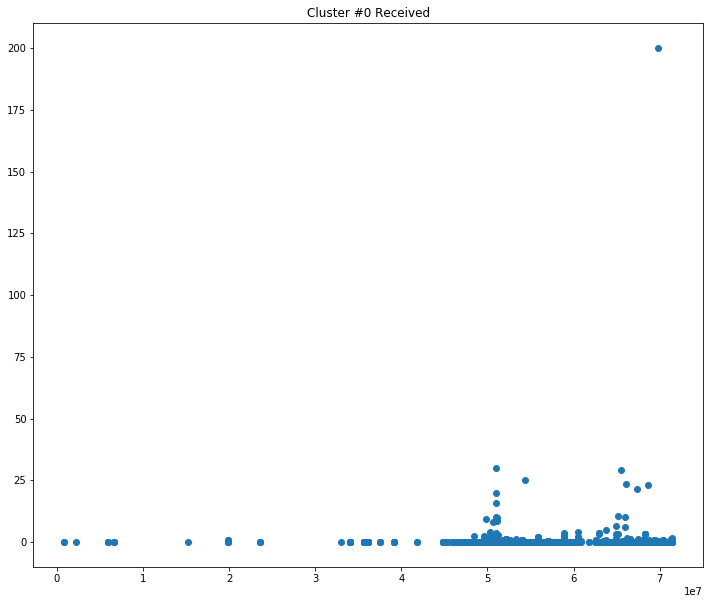

In [16]:
plt.figure(figsize=(12,10))
plt.scatter(data_cl_0.address_id, data_cl_0.received)
            
#plt.colorbar()
plt.title('Cluster #0 Received')

Text(0.5,1,'Cluster #0 Sent')

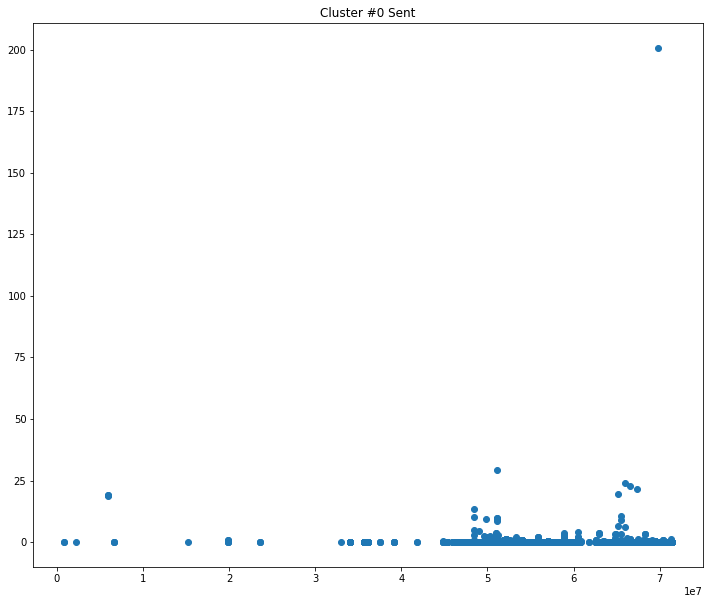

In [17]:
plt.figure(figsize=(12,10))
plt.scatter(data_cl_0.address_id, data_cl_0.sent)
            
#plt.colorbar()
plt.title('Cluster #0 Sent')

Тут один адрес прям заметен, который около 200 BTC и перевел и получил за раз.

Text(0.5,1,'Cluster #1 Received')

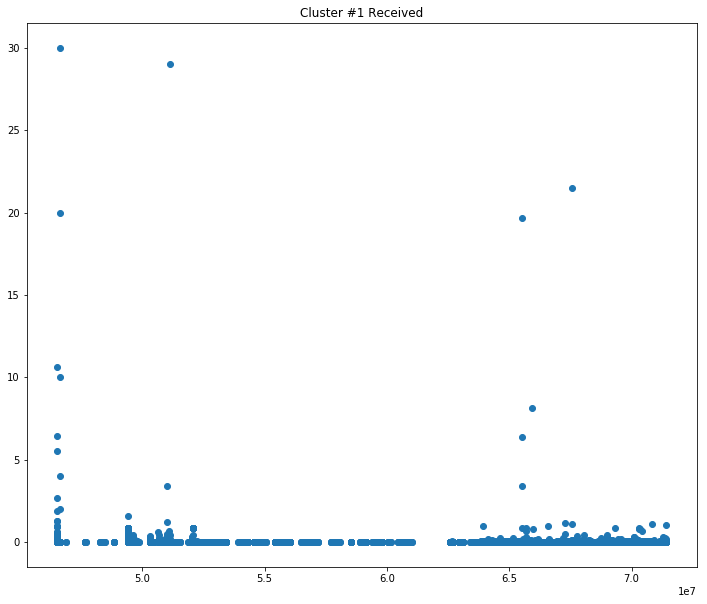

In [18]:
plt.figure(figsize=(12,10))
plt.scatter(data_cl_1.address_id, data_cl_1.received)
            
#plt.colorbar()
plt.title('Cluster #1 Received')

Text(0.5,1,'Cluster #1 Sent')

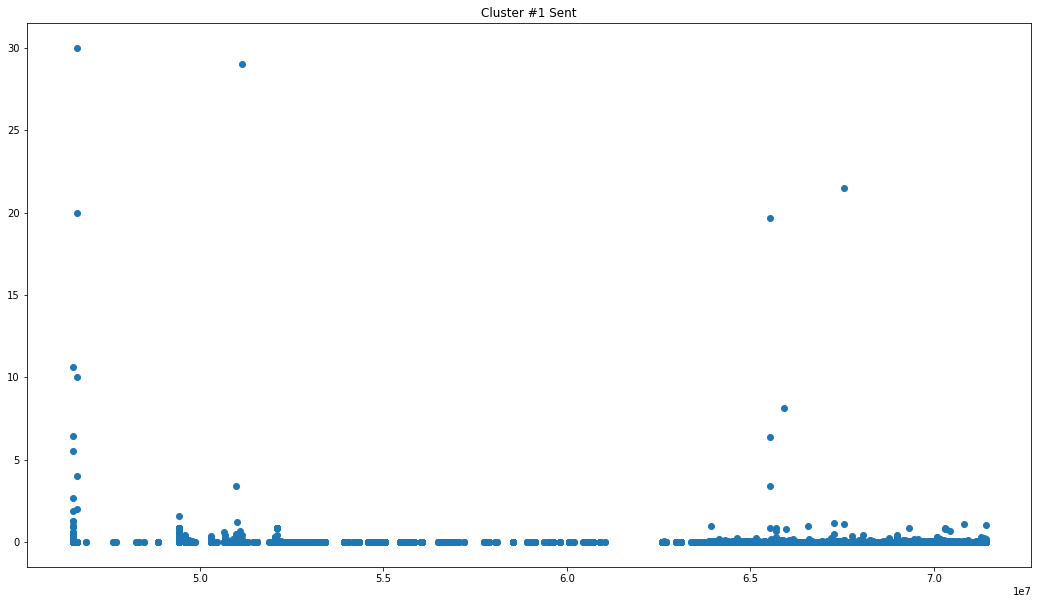

In [20]:
plt.figure(figsize=(18,10))
plt.scatter(data_cl_1.address_id, data_cl_1.sent)
            
#plt.colorbar()
plt.title('Cluster #1 Sent')

Text(0.5,1,'Cluster #2 Received')

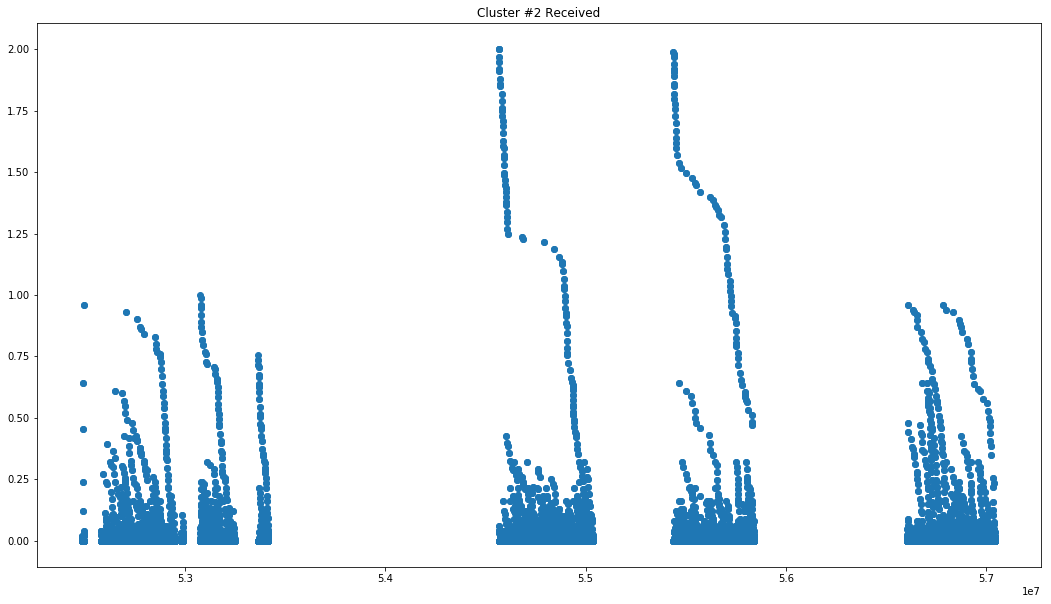

In [21]:
plt.figure(figsize=(18,10))
plt.scatter(data_cl_2.address_id, data_cl_2.received)
            
#plt.colorbar()
plt.title('Cluster #2 Received')

Text(0.5,1,'Cluster #2 Sent')

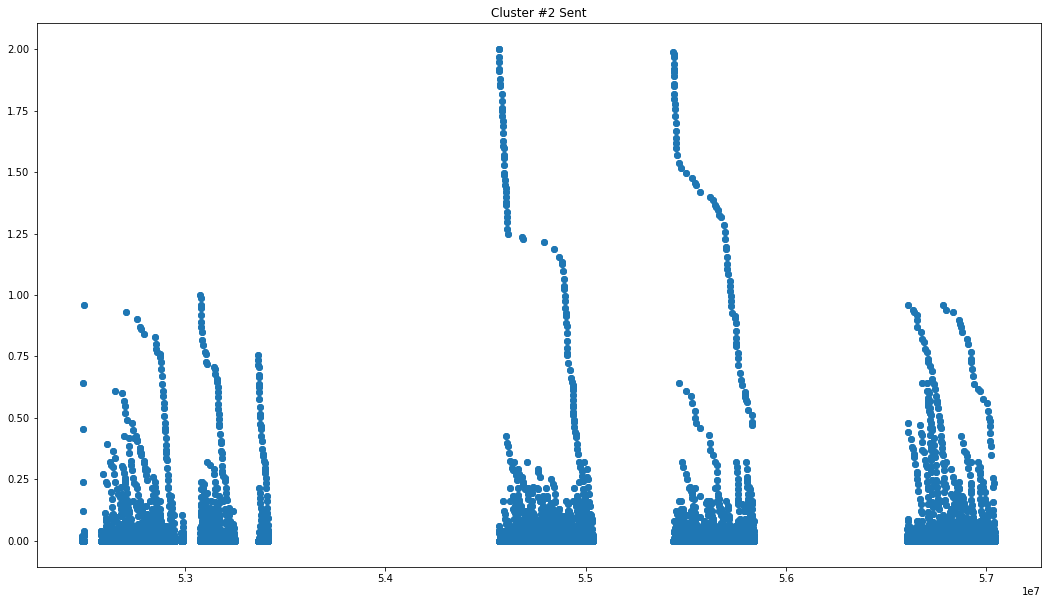

In [22]:
plt.figure(figsize=(18,10))
plt.scatter(data_cl_2.address_id, data_cl_2.sent)
            
#plt.colorbar()
plt.title('Cluster #2 Sent')

Весьма странный кластер получился. Во-первых, суммы не превышают 2 BTC, в отличие от кластеров 0,1. Во-вторых этот кластер сам удачно кластеризуется по address_id. Ну и в-третьих, "усы" выглядят так, как будто происходит переток денег с одного адреса к другому. 

In [27]:
data.groupby(['cluster_id']).describe().T

cluster_id                 0.0           1.0           2.0
address_id count  1.824900e+04  3.294900e+04  2.552600e+04
           mean   5.602113e+07  5.300679e+07  5.487205e+07
           std    6.375154e+06  5.851048e+06  1.473195e+06
           min    8.214750e+05  4.652909e+07  5.248550e+07
           25%    5.223972e+07  4.960433e+07  5.316827e+07
           50%    5.323233e+07  5.067227e+07  5.492300e+07
           75%    5.803784e+07  5.320043e+07  5.581859e+07
           max    7.147693e+07  7.141345e+07  5.704633e+07
received   count  1.824900e+04  3.294900e+04  2.552600e+04
           mean   5.634148e-02  1.950712e-02  4.030364e-02
           std    1.586987e+00  3.264454e-01  1.631877e-01
           min    0.000000e+00  0.000000e+00  0.000000e+00
           25%    0.000000e+00  0.000000e+00  0.000000e+00
           50%    0.000000e+00  9.540000e-05  0.000000e+00
           75%    1.128500e-02  1.768000e-02  1.512500e-02
           max    2.001018e+02  3.000000e+01  2.000000e+00
sent       count  1.824900e+04  3.294900e+04  2.552600e+04
           mean   5.647232e-02  1.943200e-02  4.039970e-02
           std    1.581294e+00  3.265497e-01  1.633539e-01
           min    0.000000e+00  0.000000e+00  0.000000e+00
           25%    0.000000e+00  0.000000e+00  0.000000e+00
           50%    5.500000e-05  0.000000e+00  5.500000e-05
           75%    1.125169e-02  1.752000e-02  1.523840e-02
           max    2.007169e+02  3.000000e+01  2.000000e+00

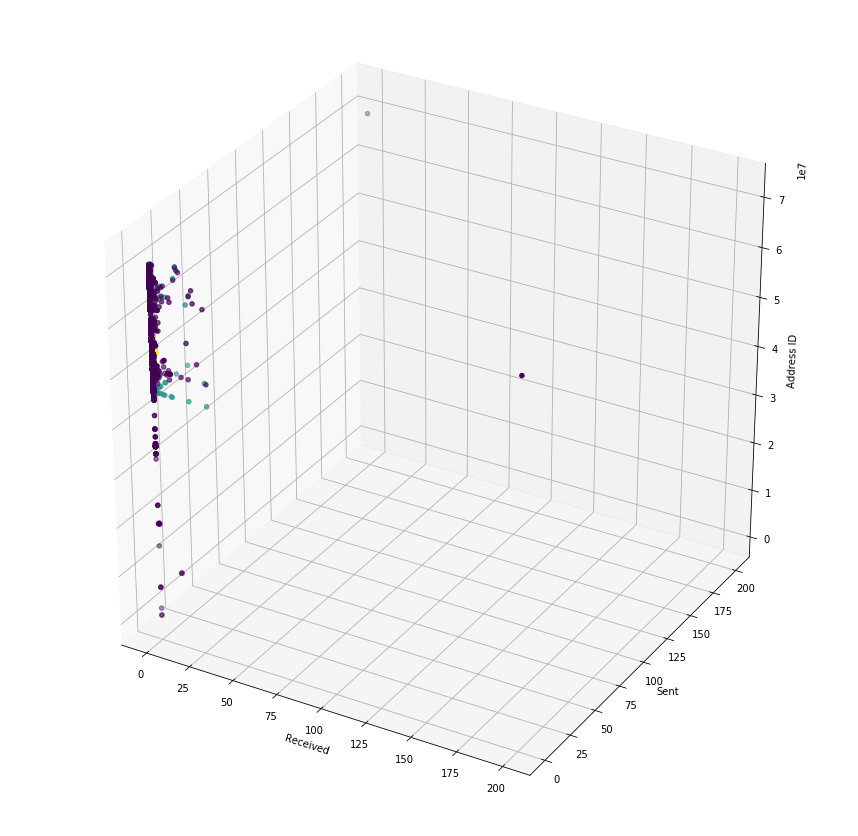

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

x = data.received
y = data.sent
z = data.address_id

ax.scatter(x,y,z, c=data.cluster_id)
ax.set_xlabel('Received')
ax.set_ylabel('Sent')
ax.set_zlabel('Address ID')

plt.show()

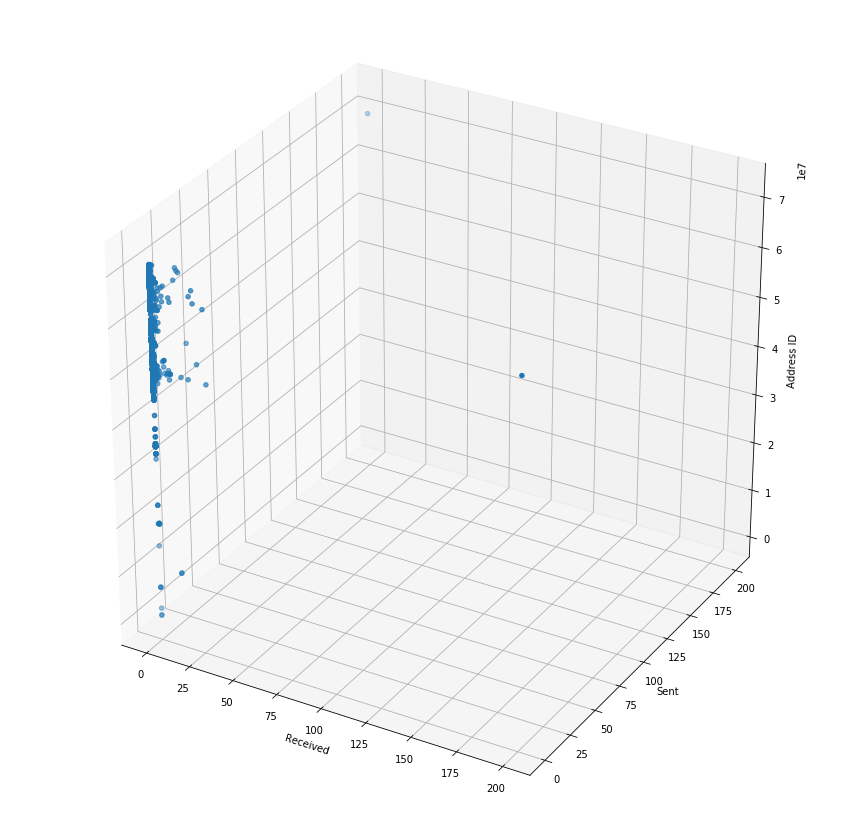

In [32]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

x = data_cl_0.received
y = data_cl_0.sent
z = data_cl_0.address_id

ax.scatter(x,y,z)
ax.set_xlabel('Received')
ax.set_ylabel('Sent')
ax.set_zlabel('Address ID')
#ax.title('Cluster #0')
plt.show()

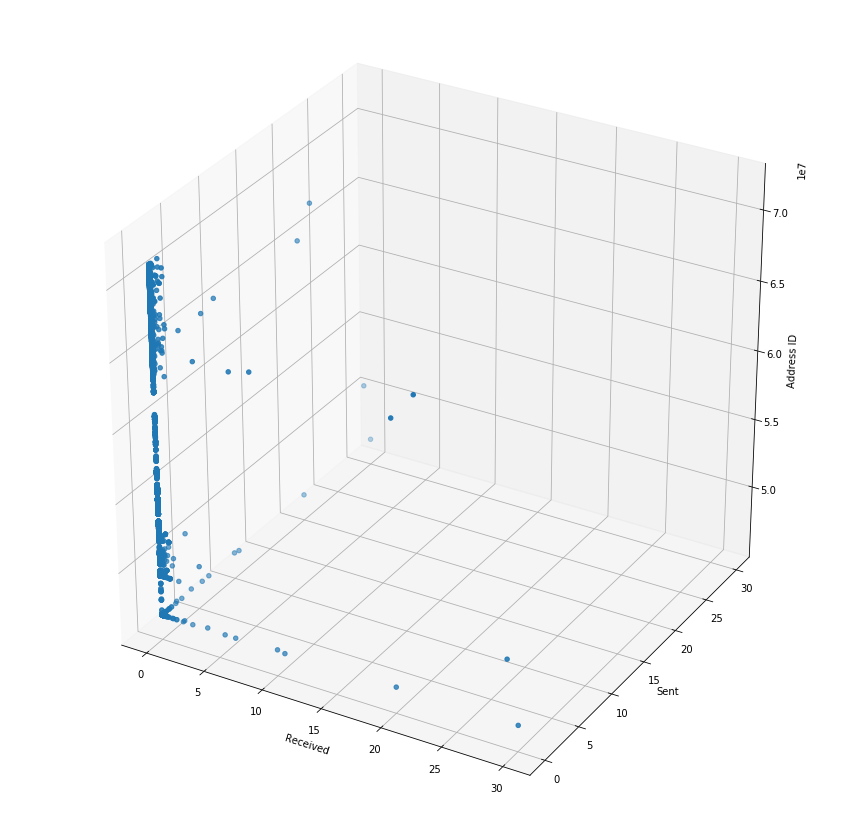

In [33]:
fig = plt.figure(figsize=(15,15))             # Cluster #1
ax = fig.add_subplot(111, projection='3d')

x = data_cl_1.received
y = data_cl_1.sent
z = data_cl_1.address_id

ax.scatter(x,y,z)
ax.set_xlabel('Received')
ax.set_ylabel('Sent')
ax.set_zlabel('Address ID')

plt.show()

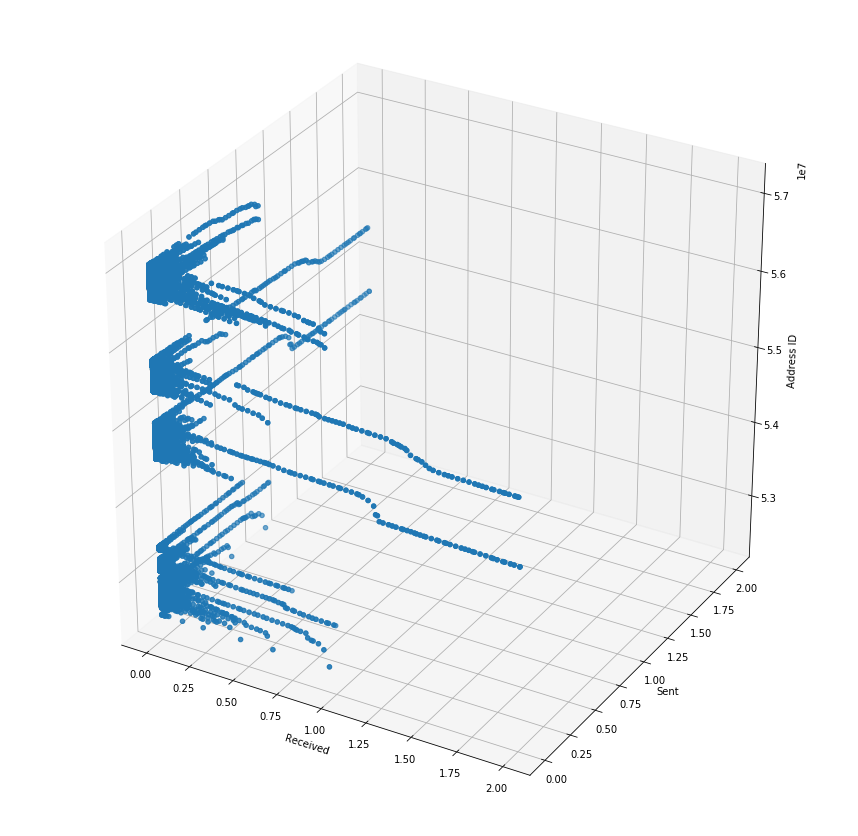

In [34]:
fig = plt.figure(figsize=(15,15))            # Cluster #2
ax = fig.add_subplot(111, projection='3d')

x = data_cl_2.received
y = data_cl_2.sent
z = data_cl_2.address_id

ax.scatter(x,y,z)
ax.set_xlabel('Received')
ax.set_ylabel('Sent')
ax.set_zlabel('Address ID')

plt.show()

Text(0.5,1,'Cluster #2 Sent vs Received')

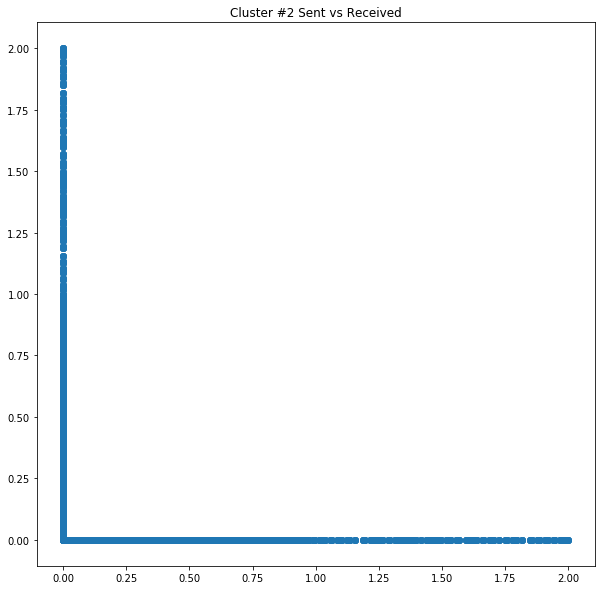

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(data_cl_2.received, data_cl_2.sent)
            
#plt.colorbar()
plt.title('Cluster #2 Sent vs Received')

Text(0.5,1,'Cluster #0 Sent vs Received')

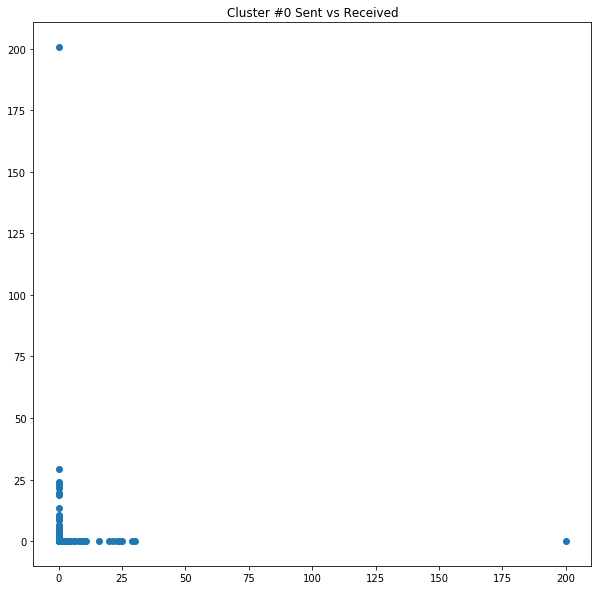

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(data_cl_0.received, data_cl_0.sent)
            
#plt.colorbar()
plt.title('Cluster #0 Sent vs Received')

Text(0.5,1,'Cluster #1 Sent vs Received')

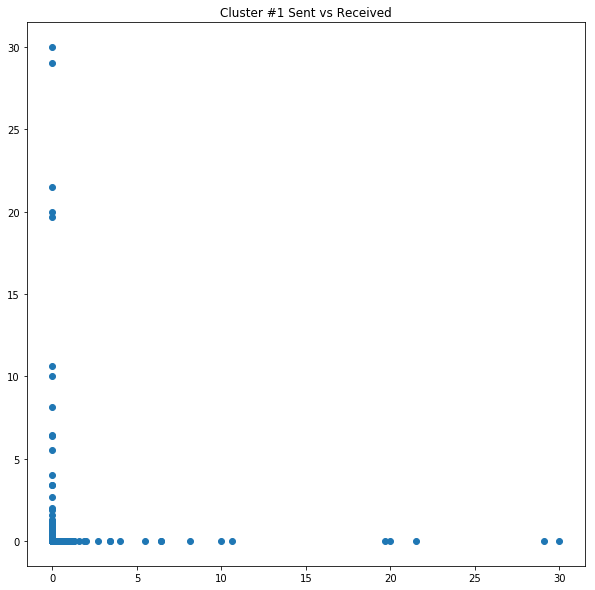

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(data_cl_1.received, data_cl_1.sent)
            
#plt.colorbar()
plt.title('Cluster #1 Sent vs Received')